In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Text(0.5, 1.0, 'Reference Image Histogram')

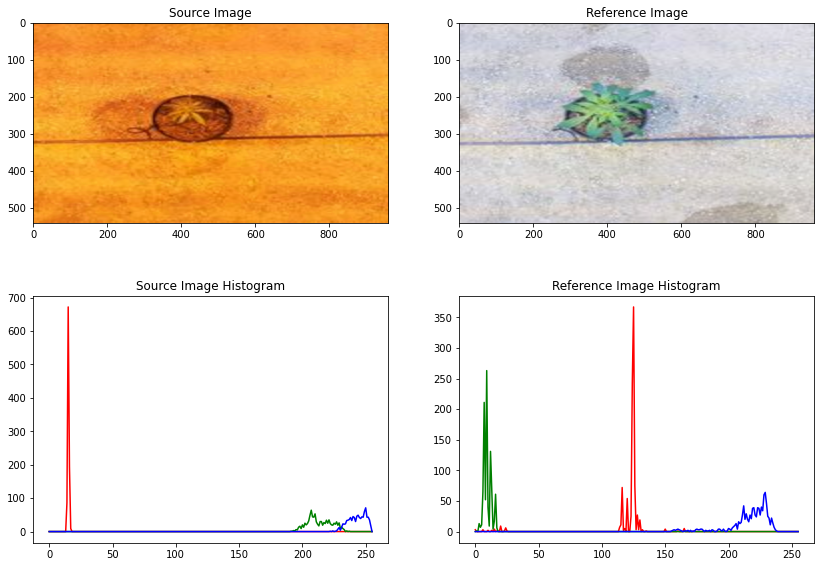

In [2]:


width = 960
height = 540

img = cv2.imread(r"C:\Users\manub\Desktop\test.1.jpeg");
img = cv2.resize(img, [width,height])
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img2RHist = cv2.calcHist(img2[:,:,0],[0],None,[256], [0, 255])
img2GHist = cv2.calcHist(img2[:,:,1],[0],None,[256], [0, 255])
img2BHist = cv2.calcHist(img2[:,:,2],[0],None,[256], [0, 255])



bg1 = cv2.imread(r"C:\Users\manub\Desktop\test.4.jpeg");
bg1 = cv2.resize(bg1, [width,height])
bg2 = cv2.cvtColor(bg1, cv2.COLOR_BGR2HSV)

bg2RHist = cv2.calcHist(bg2[:,:,0],[0],None,[256], [0, 255])
bg2GHist = cv2.calcHist(bg2[:,:,1],[0],None,[256], [0, 255])
bg2BHist = cv2.calcHist(bg2[:,:,2],[0],None,[256], [0, 255])

plt.figure(figsize=(14,10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_HSV2RGB))
plt.title('Source Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(bg2, cv2.COLOR_HSV2RGB))
plt.title('Reference Image')

plt.subplot(2, 2, 3)
plt.plot(img2RHist, 'r-')
plt.plot(img2GHist, 'g-')
plt.plot(img2BHist, 'b-')
plt.title('Source Image Histogram')

plt.subplot(2, 2, 4)
plt.plot(bg2RHist, 'r-')
plt.plot(bg2GHist, 'g-')
plt.plot(bg2BHist, 'b-')
plt.title('Reference Image Histogram')

In [3]:
x = img2.reshape([width*height,3])/255.0
y = bg2.reshape([width*height,3])/255.0

In [4]:

input_shape = (3,)
num_classes = 3

model = keras.Sequential()
model.add(layers.Dense(32, activation='sigmoid', input_shape=input_shape))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [6]:
history = model.fit(x,y,batch_size=256,epochs=5)

Epoch 1/5
2025/2025 [==============================] - 2s 701us/step - loss: 0.0216
Epoch 2/5
2025/2025 [==============================] - 1s 700us/step - loss: 0.0181
Epoch 3/5
2025/2025 [==============================] - 2s 752us/step - loss: 0.0173
Epoch 4/5
2025/2025 [==============================] - 2s 768us/step - loss: 0.0162
Epoch 5/5
2025/2025 [==============================] - 2s 875us/step - loss: 0.0152


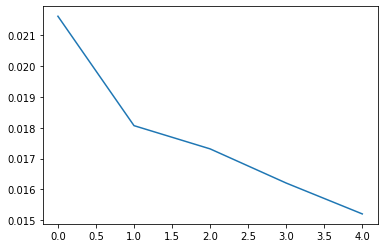

In [7]:
plt.plot(history.history['loss'])

In [8]:
#Testing
t1 = cv2.imread(r"C:\Users\manub\Desktop\test.1.jpeg");
t1 = cv2.resize(t1, [width,height])
t1 = cv2.cvtColor(t1, cv2.COLOR_BGR2HSV)

x2 = t1.reshape([width*height,3])/255.0

y = model.predict(x2)

In [9]:
y2 = y.reshape((height,width,3))
y2 = cv2.cvtColor(y2, cv2.COLOR_HSV2RGB)

Text(0.5, 1.0, 'Modified Image Histogram')

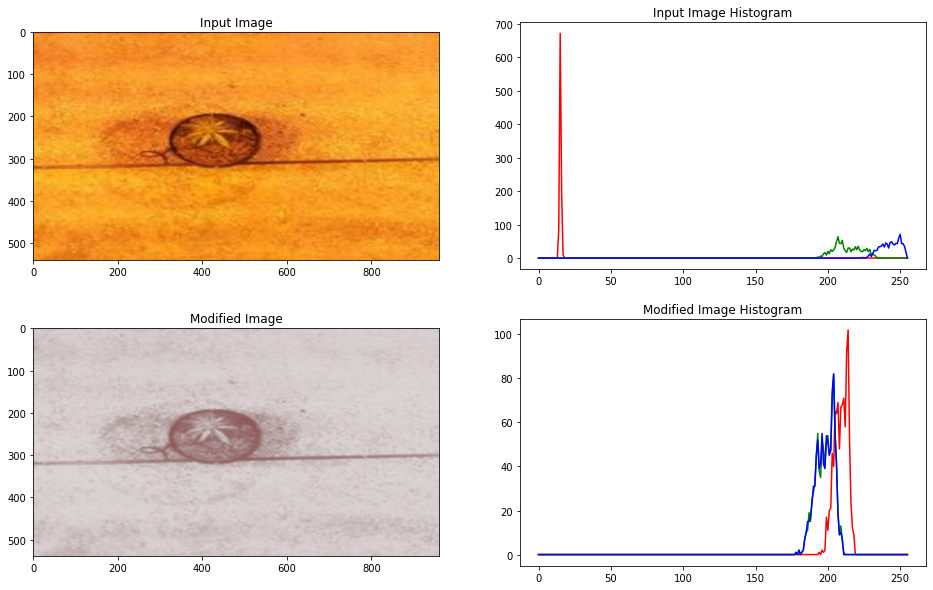

In [10]:
plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(t1, cv2.COLOR_HSV2RGB))
plt.title('Input Image')

t1RHist = cv2.calcHist(t1[:,:,0],[0],None,[256], [0, 255])
t1GHist = cv2.calcHist(t1[:,:,1],[0],None,[256], [0, 255])
t1BHist = cv2.calcHist(t1[:,:,2],[0],None,[256], [0, 255])

plt.subplot(2, 2, 2)
plt.plot(t1RHist, 'r-')
plt.plot(t1GHist, 'g-')
plt.plot(t1BHist, 'b-')
plt.title('Input Image Histogram')



plt.subplot(2,2,3)
plt.imshow(y2)
plt.title('Modified Image')

y3 = (y2*255)

yRHist = cv2.calcHist(y3[:,:,0],[0],None,[256], [0, 255])
yGHist = cv2.calcHist(y3[:,:,1],[0],None,[256], [0, 255])
yBHist = cv2.calcHist(y3[:,:,2],[0],None,[256], [0, 255])

plt.subplot(2, 2, 4)
plt.plot(yRHist, 'r-')
plt.plot(yGHist, 'g-')
plt.plot(yBHist, 'b-')
plt.title('Modified Image Histogram')